# Classifying Wine using Ensemble Learning

Source: https://archive.ics.uci.edu/dataset/109/wine

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

df = pd.read_csv("wine_data.csv")
df.head()

,Class,Alcohol,Malic_acid,Ash,Alkalinity_of_ash,Magnesium,Total_phenols,Flavonoids,Nonflavonoid_phenols,Proanthocyanins,Color_intensity,Hue,Protein_purity,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Split data set into training and testing

In [2]:
# Split data and normalize data

X = df.iloc[:,1:].to_numpy()
y = df.iloc[:,0].to_numpy().reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## View boxplots of the dataset

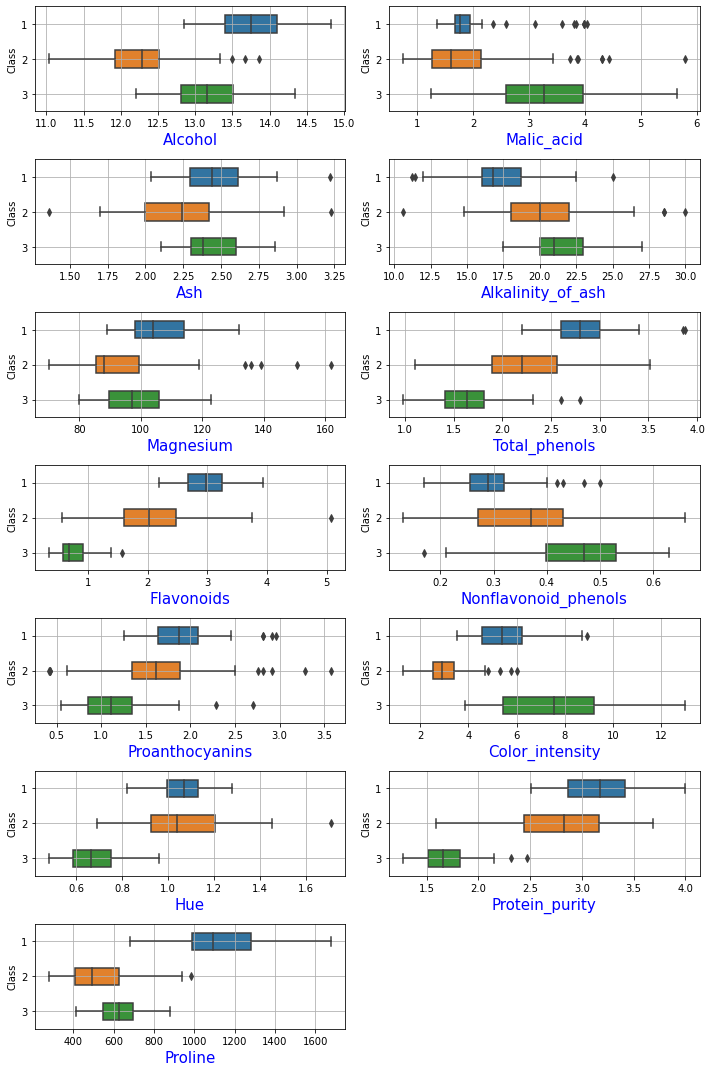

In [3]:
plt.figure(figsize=(10,15))
for i in range(1,len(df.columns)):
    plt.subplot(7,2,i)
    g = sns.boxplot(data=df.iloc[:,np.array([0, i])], orient="h",
                    x=df.columns.values[i], y='Class', width=0.5)
    plt.xlabel(df.columns.values[i], fontsize=15)
    g.xaxis.label.set_color('blue')
    plt.grid()

plt.tight_layout()
plt.show()

## Train kNN, Naive Bayes, and Decision Tree

In [4]:
mdls = [KNeighborsClassifier(n_neighbors=5), GaussianNB(), 
        DecisionTreeClassifier(max_depth=10, random_state=0)]
mdl_names = ['kNN','Naive Bayes','Decision Tree'] 
i = 0

for mdl in mdls:
    mdl.fit(X_train, y_train.ravel())
    print(f"Model: {mdl_names[i]}")
    print(f"  Training Accuracy: {mdl.score(X_train,y_train)}")
    print(f"  Testing Accuracy: {mdl.score(X_test,y_test)}")

    print('  Training: Confusion Matrix')
    print(confusion_matrix(y_train, mdl.predict(X_train)))
    print('  Testing: Confusion Matrix')
    print(confusion_matrix(y_test, mdl.predict(X_test)))
    print('\n')
    i += 1

Model: kNN
  Training Accuracy: 0.8145161290322581
  Testing Accuracy: 0.7222222222222222
  Training: Confusion Matrix
[[39  0  2]
 [ 3 39  8]
 [ 2  8 23]]
  Testing: Confusion Matrix
[[18  0  0]
 [ 2 13  6]
 [ 4  3  8]]


Model: Naive Bayes
  Training Accuracy: 0.967741935483871
  Testing Accuracy: 0.9629629629629629
  Training: Confusion Matrix
[[39  2  0]
 [ 0 48  2]
 [ 0  0 33]]
  Testing: Confusion Matrix
[[17  1  0]
 [ 0 20  1]
 [ 0  0 15]]


Model: Decision Tree
  Training Accuracy: 1.0
  Testing Accuracy: 0.9444444444444444
  Training: Confusion Matrix
[[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]
  Testing: Confusion Matrix
[[18  0  0]
 [ 1 19  1]
 [ 0  1 14]]




## View the trained Decision Tree

[[0 'Alcohol']
 [1 'Malic_acid']
 [2 'Ash']
 [3 'Alkalinity_of_ash']
 [4 'Magnesium']
 [5 'Total_phenols']
 [6 'Flavonoids']
 [7 'Nonflavonoid_phenols']
 [8 'Proanthocyanins']
 [9 'Color_intensity']
 [10 'Hue']
 [11 'Protein_purity']
 [12 'Proline']]


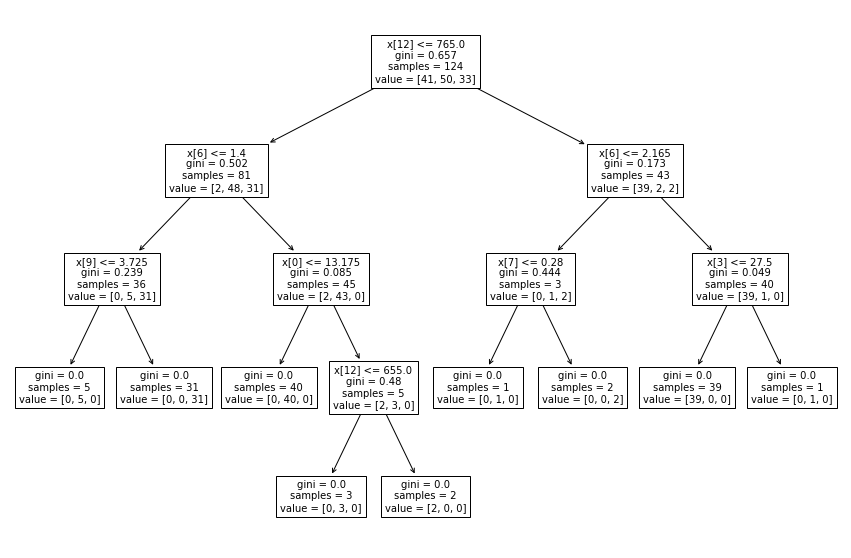

In [5]:
print(np.hstack((np.arange(13).reshape(-1,1), 
                 df.columns.values[1:].reshape(-1,1))))
plt.figure(figsize=(15,10))
plot_tree(mdls[2], fontsize=10)
plt.show()

## Train XGBoost and Random Forest

In [6]:
# Don't forget to do "pip install xgboost"
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest
RF = RandomForestClassifier().fit(X_train, y_train.ravel())
print("Random Forest Model:")
print(f"  Training Accuracy: {RF.score(X_train,y_train)}")
print(f"  Testing Accuracy: {RF.score(X_test,y_test)}")

print('  Training: Confusion Matrix')
print(confusion_matrix(y_train, RF.predict(X_train)))
print('  Testing: Confusion Matrix')
print(confusion_matrix(y_test, RF.predict(X_test)))
print('\n')

# XGBoost
y_train_ = y_train - 1
y_test_ = y_test - 1

XG = XGBClassifier().fit(X_train, y_train_.ravel())
print("XGBoost Model:")
print(f"  Training Accuracy: {XG.score(X_train,y_train_)}")
print(f"  Testing Accuracy: {XG.score(X_test,y_test_)}")

print('  Training: Confusion Matrix')
print(confusion_matrix(y_train_, XG.predict(X_train)))
print('  Testing: Confusion Matrix')
print(confusion_matrix(y_test_, XG.predict(X_test)))
print('\n')

Random Forest Model:
  Training Accuracy: 1.0
  Testing Accuracy: 1.0
  Training: Confusion Matrix
[[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]
  Testing: Confusion Matrix
[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


XGBoost Model:
  Training Accuracy: 1.0
  Testing Accuracy: 0.9814814814814815
  Training: Confusion Matrix
[[41  0  0]
 [ 0 50  0]
 [ 0  0 33]]
  Testing: Confusion Matrix
[[18  0  0]
 [ 0 21  0]
 [ 0  1 14]]


